In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/ad_spend.csv')
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [3]:
df.shape

(200, 3)

In [5]:
g = df.groupby('Season')[["Ad Spend ($)","Revenue ($)"]].mean()

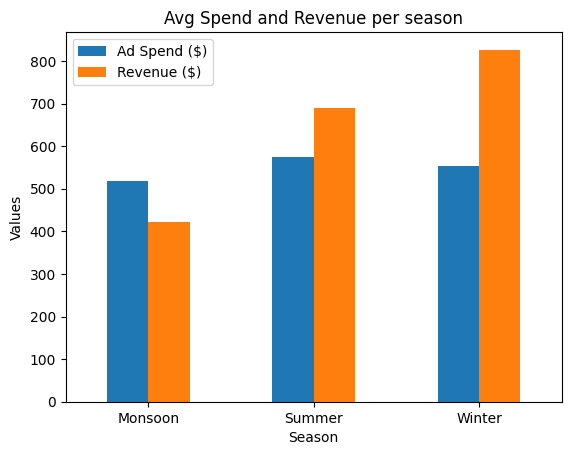

In [10]:
ax = g.plot(kind='bar')

ax.set_title("Avg Spend and Revenue per season")
ax.set_xlabel('Season')
ax.set_ylabel('Values')

plt.xticks(rotation = 0)
plt.show()

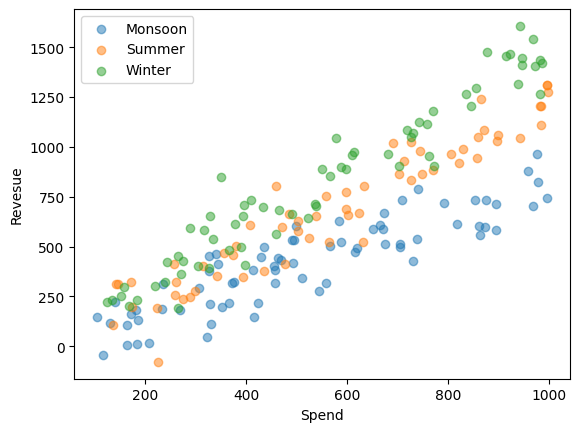

In [11]:
for season, subdf in df.groupby('Season'):
    plt.scatter(subdf['Ad Spend ($)'],subdf['Revenue ($)'], label = season, alpha=0.5)
    
plt.xlabel('Spend')
plt.ylabel('Revesue')
plt.legend()
plt.show()

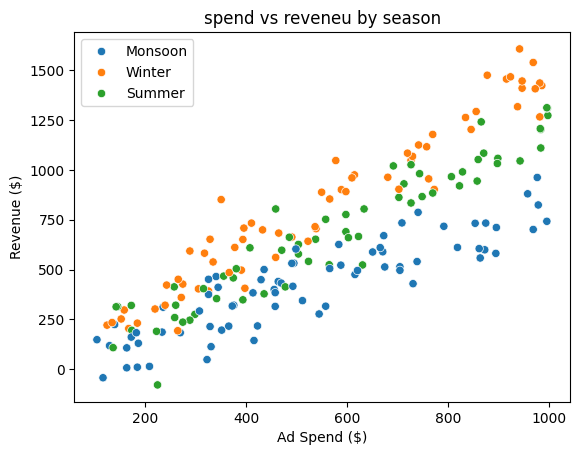

In [ ]:
sns.scatterplot(df,x='Ad Spend ($)',y='Revenue ($)',hue='Season')
plt.title('spend vs reveneu by season')
plt.legend()

In [16]:
df_encode = pd.get_dummies(df,columns=['Season'],drop_first=True,dtype=int)
df_encode.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,0,0
1,158,297,0,1
2,328,214,0,0
3,322,48,0,0
4,726,1048,0,1


In [27]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('Revenue ($)',axis=1)
y = df_encode['Revenue ($)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
## Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

print(f'R2-Score - {round(r2_score(y_test,y_pred)*100,2)}')

R2-Score - 87.53


In [29]:
## Desision Tree Regression

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(f'R2-Score - {round(r2_score(y_test,y_pred)*100,2)}')

R2-Score - 78.62


In [33]:
## Gradiant Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

print(f'R2-Score - {round(r2_score(y_test,y_pred)*100,2)}')

R2-Score - 85.67


In [34]:
df_evalute = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df_evalute

,Actual,Predict
95,903,954.462814
15,1047,871.587571
30,1026,871.950129
158,1203,1289.316134
128,558,667.819039
115,354,473.819227
69,1446,1460.144733
170,108,273.567756
174,375,278.453168
45,522,543.837190


In [36]:
df_evalute['percent_diff'] = round(abs((df_evalute['Actual'] - df_evalute['Predict'])*100/df_evalute['Actual']),2)
df_evalute

,Actual,Predict,percent_diff
95,903,954.462814,5.70
15,1047,871.587571,16.75
30,1026,871.950129,15.01
158,1203,1289.316134,7.18
128,558,667.819039,19.68
115,354,473.819227,33.85
69,1446,1460.144733,0.98
170,108,273.567756,153.30
174,375,278.453168,25.75
45,522,543.837190,4.18
